<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter7/Chapter7_2_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 일표본 T-검정(One sample t-test)

cats 데이터에서 고양이들의 평균몸무게가 2.6kg인지 아닌지 통계적 검정을 수행하고, 결과를 해석해보자

In [1]:
import pandas as pd
cats = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_Ver01/main/data/cats.csv")
cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [3]:
# Btw 컬럼은 고양이의 몸무게를 의미하고, Hwt는 고양이의 길이를 의미한다.
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [4]:
# 고양이의 몸무게가 2.6kg인지를 검정하므로, mu 변수에 2.6kg을 할당한다
# 그리고 고양이의 몸무게만 추출하여 shapiro test를 통해 데이터의 정규성을 검정한다
mu = 2.6
import scipy.stats as stats
from scipy.stats import shapiro

shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518791269479144, pvalue=6.730857622701013e-05)

검정통계치 : 0.95187  
p-value : 6.730e-05  
유의수준보다 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다.  
즉, cats데이터의 Bwt변수는 정규분포를 따르지 않는다.  
데이터가 정규분포를 따르지 않으므로 wilcoxon test로 t-test를 진행한다.  
(만약 정규분포를 따랐다면 stats.ttest_1samp(cats.Bwt, popmean=mu)를 사용하면 된다)

In [7]:
stats.wilcoxon(cats['Bwt']-mu, alternative = 'two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [8]:
cats['Bwt'].unique()

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.9, 3. , 2.8, 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9])

<ipython-input-9-a139d5f9f025>:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort = False)


Text(0, 0.5, 'Count')

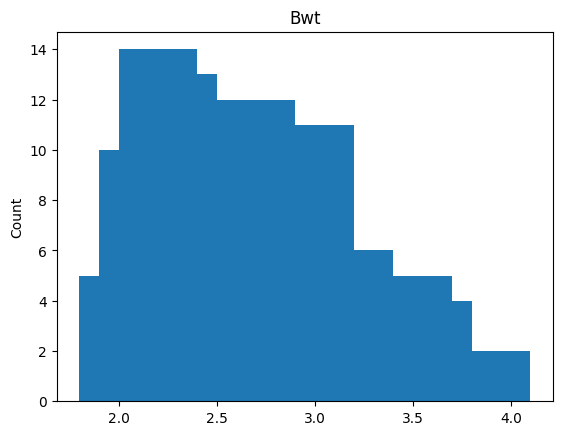

In [9]:
# 시각화로 데이터 분포를 확인한다.
import matplotlib.pyplot as plt

cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort = False)
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values, width = 0.4)
plt.title('Bwt')
plt.ylabel('Count')

# 2. 대응표본 T-검정(Paired Sample t-test)
10명의 환자 대상 수면영양제 복용 전과 후의 수면시간을 측정하고, 영양제의 효과가 있는지를 판단해보자. (표본이 정규성을 만족한다는 가정하에 검정 수행, 만족하지 않으면 Wilcoxon-test진행)

In [10]:
data = {'before':[7,3,4,5,2,1,6,6,5,4],
        'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


해당 데이터를 검정하기 위한 가설을 수립한다.  
귀무가설 : 수면제 복용 전과 후의 수면시간 차이는 없다.   
대립가설 : 수면제 복용 전과 후의 수면시간 차이는 있다.  

In [11]:
shapiro(data['before'])

ShapiroResult(statistic=0.9644595362997496, pvalue=0.8352703969642297)

In [12]:
shapiro(data['after'])

ShapiroResult(statistic=0.9456836842543015, pvalue=0.6177986322207938)

In [16]:
stats.ttest_rel(data['after'], data['before'], alternative='greater')

TtestResult(statistic=4.743416490252569, pvalue=0.0005269356285082764, df=9)

p-value값이 0.05보다 작으므로 귀무가설을 기각한다.

In [17]:
data.mean()

,0
before,4.3
after,5.3


# 3. 독립표본 t-test(Independent Sample t-test)
cats 데이터를 가지고 정규성을 따른다는 가정하에 수컷인 고양이와 암컷인 고양이의 몸무게 차이를 비교해보자.  
귀무가설 : 수컷와 암컷 고양이의 몸무게 차이는 없다.  
대립가설 : 수컷과 암컷 고양이의 몸무게 차이는 있다.  

In [21]:
female = cats[cats['Sex'] == 'F']['Bwt']
male = cats[cats['Sex'] == 'M']['Bwt']
stats.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

p-value가 0.05보다 작으므로, 등분산성을 만족하지 못한다  
따라서 equal_var = False로 독립 t-test를 진행한다.

In [22]:
stats.ttest_ind(female, male, equal_var = False)

TtestResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15, df=136.83788299625363)

p-value가 0.05보다 작으므로, 두 모평균 사이의 차이는 존재한다고 볼 수 있다.

In [23]:
print(female.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


<ipython-input-25-25cbeeffc6ae>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  female_Bwt_cnt = pd.value_counts(female.values, sort = False)
<ipython-input-25-25cbeeffc6ae>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  male_Bwt_cnt = pd.value_counts(male.values, sort = False)


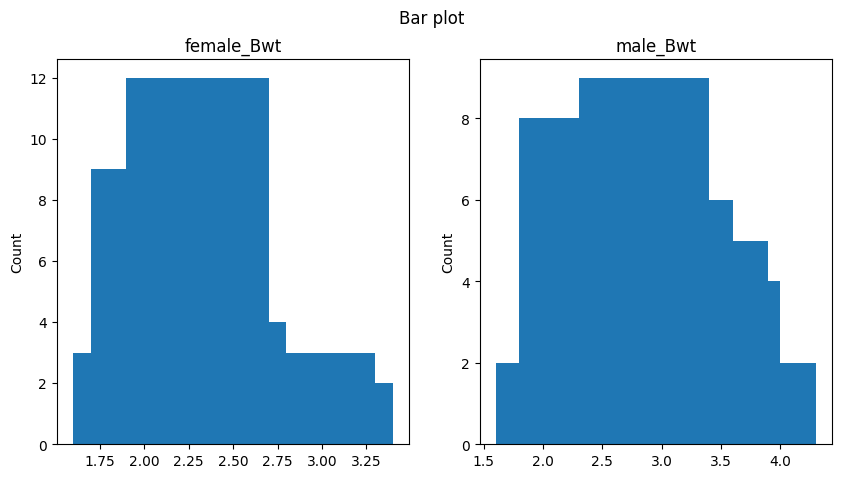

In [25]:
# 이를 시각화하여 데이터의 분포가 어떠한 차이가 있는지 명확하게 파악해보자
female_Bwt_cnt = pd.value_counts(female.values, sort = False)
male_Bwt_cnt = pd.value_counts(male.values, sort = False)
fig, axs = plt.subplots(1,2, figsize = (10,5))
fig.suptitle('Bar plot')
widht = 0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()